### Play around with the twolayer slab model to make an emission line with absorption

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd
from astropy.convolution import convolve

import sys
sys.path.append('/Users/jpw/py/spectools_ir/')
from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.slabspec.slabspec import _spec_convol_klaus
import slabspec_twolayer

%matplotlib widget
#%matplotlib inline

In [2]:
hitran_CO10 = extract_hitran_data('CO', 4.58, 5.2, vup=1)
hitran_CO21 = extract_hitran_data('CO', 4.58, 5.2, vup=2)
hitran_13CO10 = extract_hitran_data('CO', 4.58, 5.2, vup=2)

In [3]:
start_time = timeit.default_timer()

# slab model parameters
au = 1.5e11     # au in m
N1 = 1e0        # column density of molecule (not H2) in back layer in m-2
T1 = 100        # temperature of back layer in K
fwhm1 = 1       # fwhm of back layer in km/s
N2 = 1.5e20     # front (absorbing) layer properties in m^-2 (NOT cm^-2)
T2= 700
fwhm2 = 14
A = (0.5)**2  # emitting area in au^2
X13 = 1/60       # 13CO/CO ratio
continuum = 10.0 # continuum flux in Jy

spec_CO10 = slabspec_twolayer.make_spec_twolayer('CO', N1, T1, 0, fwhm1, N2, T2, 0, fwhm2, A, continuum, wmin=4.58, wmax=5.2, d_pc=140., res=1e-5, vup=1)

elapsed = timeit.default_timer() - start_time
print(f'Model took {elapsed:5.2f} seconds')

Model took  2.26 seconds


In [4]:
# normalize by the continuum - in principle constrained by obs but here a free (fudge) parameter
#scale = 5.0
wave_model = spec_CO10['spectrum']['wave']
#flux_model = 1 + scale * spec_CO10['spectrum']['flux']
flux_model = spec_CO10['spectrum']['flux']

# final step is to convolve to the resolving power of the data
R = 25000
#flux_model_R = _spec_convol_klaus(wave_model, flux_model, R)

Text(0, 0.5, 'Flux [Jy]')

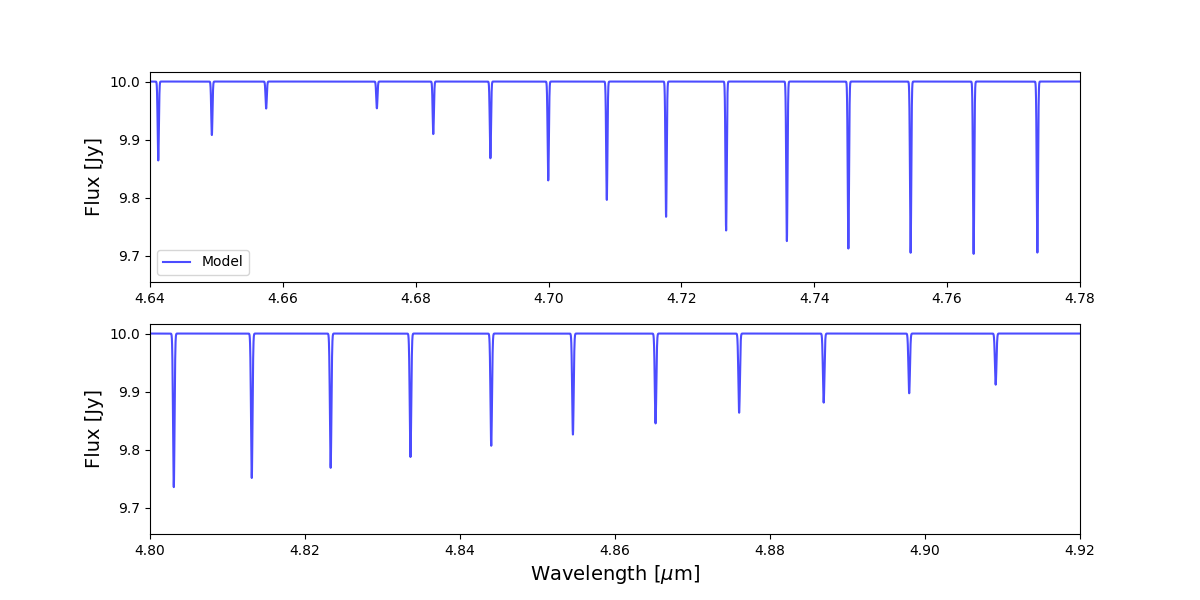

In [5]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(211)
#ax1.plot(wave, flux, color='gray', label='Data')
#ax1.plot(wave_model, flux_model_R, color='blue', label='Model', alpha=0.7)
ax1.plot(wave_model, flux_model, color='blue', label='Model', alpha=0.7)
wmin, wmax = 4.64, 4.78
ax1.set_xlim(wmin, wmax)
ax1.set_ylabel('Flux [Jy]', fontsize=14)
ax1.legend()

ax2 = fig.add_subplot(212)
#ax2.plot(wave, flux, color='gray', label='Data')
#ax2.plot(wave_model, flux_model_R, color='blue', label='Model', alpha=0.7)
ax2.plot(wave_model, flux_model, color='blue', label='Model', alpha=0.7)
wmin, wmax = 4.80, 4.92
ax2.set_xlim(wmin, wmax)
ax2.set_xlabel('Wavelength [$\mu$m]', fontsize=14)
ax2.set_ylabel('Flux [Jy]', fontsize=14)

#plt.savefig('test_fit.png')